# Limpieza de datos de la encuesta

## Cargamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import unidecode
import missingno as msno
from scipy.stats import chi2_contingency
import utils
import yaml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


## Cargamos los datos

* Carga de datos originales
* Cambio de nombre de las variables según diccionario

In [2]:
__path__ = '/Users/iairlinker/Documents/repos/taller_ahh1/data/raw/'
# Load the encuesta DataFrame
encuesta = pd.read_csv(__path__ + 'encuesta.csv')
encuesta.columns


Index(['Marca temporal', 'Dirección de correo electrónico', 'Nombres',
       'Apellidos', 'Fecha de nacimiento', '¿Qué tanto te gusta estudiar?',
       '¿Cuántas horas te dedicarías en una semana a estudiar para una asignatura si no tuvieras una evaluación pronto?',
       '¿Cuánto tiempo dedicas en una semana a estudiar para una asignatura en la que pronto tendrás una evaluación?',
       'Si sientes que estás preparad(a/o) para una evaluación ¿Dedicarías horas a estudiar de todas formas?',
       'Cuando estudias algo relacionado con Matemática...¿Cuántos ejercicios resuelves en una sesión de estudio?',
       '¿Cuál o cuáles de los siguientes métodos utilizas para estudiar?',
       '¿En qué horario prefieres estudiar?',
       '¿Qué lugar(es) utilizas para estudiar?',
       '¿Qué factores consideras que dificultan tus estudios?',
       '¿Sientes que tienes tiempo suficiente para estudiar?',
       '¿Cuántas horas dedicas diariamente a dormir?',
       '¿Cuántas horas dedicas di

In [3]:
encuesta.applymap(lambda x: x.strip() if isinstance(x, str) else x)
encuesta.head().T

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_30758/1935490141.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encuesta.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,0,1,2,3,4
Marca temporal,9/12/2024 9:53:35,9/12/2024 10:10:46,9/12/2024 10:12:27,9/12/2024 10:16:27,9/12/2024 10:16:43
Dirección de correo electrónico,isidorahuaiquilaf402@gmail.com,valentina.adm.ite@gmail.com,aljaque@alumnos.uahurtado.cl,Naty20godoydu@gmail.com,tamaratello6689@gmail.com
Nombres,Isidora Esperanza,Valentina del carmen,Alexis Alexander,Natalia,Savska
Apellidos,Huaiquilaf Verdugo,Silva ite,Jaque Cardenas,Godoy,Svec jimenez
Fecha de nacimiento,3/10/2004,13/07/2005,30/06/2006,11/11/2005,15/03/2002
¿Qué tanto te gusta estudiar?,2,3,4,3,3
¿Cuántas horas te dedicarías en una semana a estudiar para una asignatura si no tuvieras una evaluación pronto?,Entre una y dos horas,Entre una y dos horas,Estudiaría hasta que sienta que estoy preparad...,Entre 2 y 4 horas,No estudiaría
¿Cuánto tiempo dedicas en una semana a estudiar para una asignatura en la que pronto tendrás una evaluación?,Estudio hasta que siento que estoy preparad(a/...,Entre una y dos horas,Entre 4 y 7 horas,Entre 4 y 7 horas,Estudio hasta que siento que estoy preparad(a/...
Si sientes que estás preparad(a/o) para una evaluación ¿Dedicarías horas a estudiar de todas formas?,Definitivamente sí,Tal vez,Definitivamente sí,Definitivamente sí,Definitivamente sí
Cuando estudias algo relacionado con Matemática...¿Cuántos ejercicios resuelves en una sesión de estudio?,Todos los necesarios (hasta que siento que est...,Ninguno. Solo reviso el material,Todos los necesarios (hasta que siento que est...,Entre 1 y 5,Entre 10 y 20


In [4]:
encuesta.iloc[0,7]

'Estudio hasta que siento que estoy preparad(a/o) no importa cuanto tiempo me tome'

## Valores NA

In [5]:
encuesta.replace("", np.nan, inplace=True)
print(encuesta.isnull().sum())
encuesta.head(2).T

Marca temporal                                                                                                      0
Dirección de correo electrónico                                                                                     0
Nombres                                                                                                             0
Apellidos                                                                                                           0
Fecha de nacimiento                                                                                                 0
¿Qué tanto te gusta estudiar?                                                                                       0
¿Cuántas horas te dedicarías en una semana a estudiar para una asignatura si no tuvieras una evaluación pronto?     0
¿Cuánto tiempo dedicas en una semana a estudiar para una asignatura en la que pronto tendrás una evaluación?        0
Si sientes que estás preparad(a/o) para una evaluación ¿

,0,1
Marca temporal,9/12/2024 9:53:35,9/12/2024 10:10:46
Dirección de correo electrónico,isidorahuaiquilaf402@gmail.com,valentina.adm.ite@gmail.com
Nombres,Isidora Esperanza,Valentina del carmen
Apellidos,Huaiquilaf Verdugo,Silva ite
Fecha de nacimiento,3/10/2004,13/07/2005
¿Qué tanto te gusta estudiar?,2,3
¿Cuántas horas te dedicarías en una semana a estudiar para una asignatura si no tuvieras una evaluación pronto?,Entre una y dos horas,Entre una y dos horas
¿Cuánto tiempo dedicas en una semana a estudiar para una asignatura en la que pronto tendrás una evaluación?,Estudio hasta que siento que estoy preparad(a/...,Entre una y dos horas
Si sientes que estás preparad(a/o) para una evaluación ¿Dedicarías horas a estudiar de todas formas?,Definitivamente sí,Tal vez
Cuando estudias algo relacionado con Matemática...¿Cuántos ejercicios resuelves en una sesión de estudio?,Todos los necesarios (hasta que siento que est...,Ninguno. Solo reviso el material


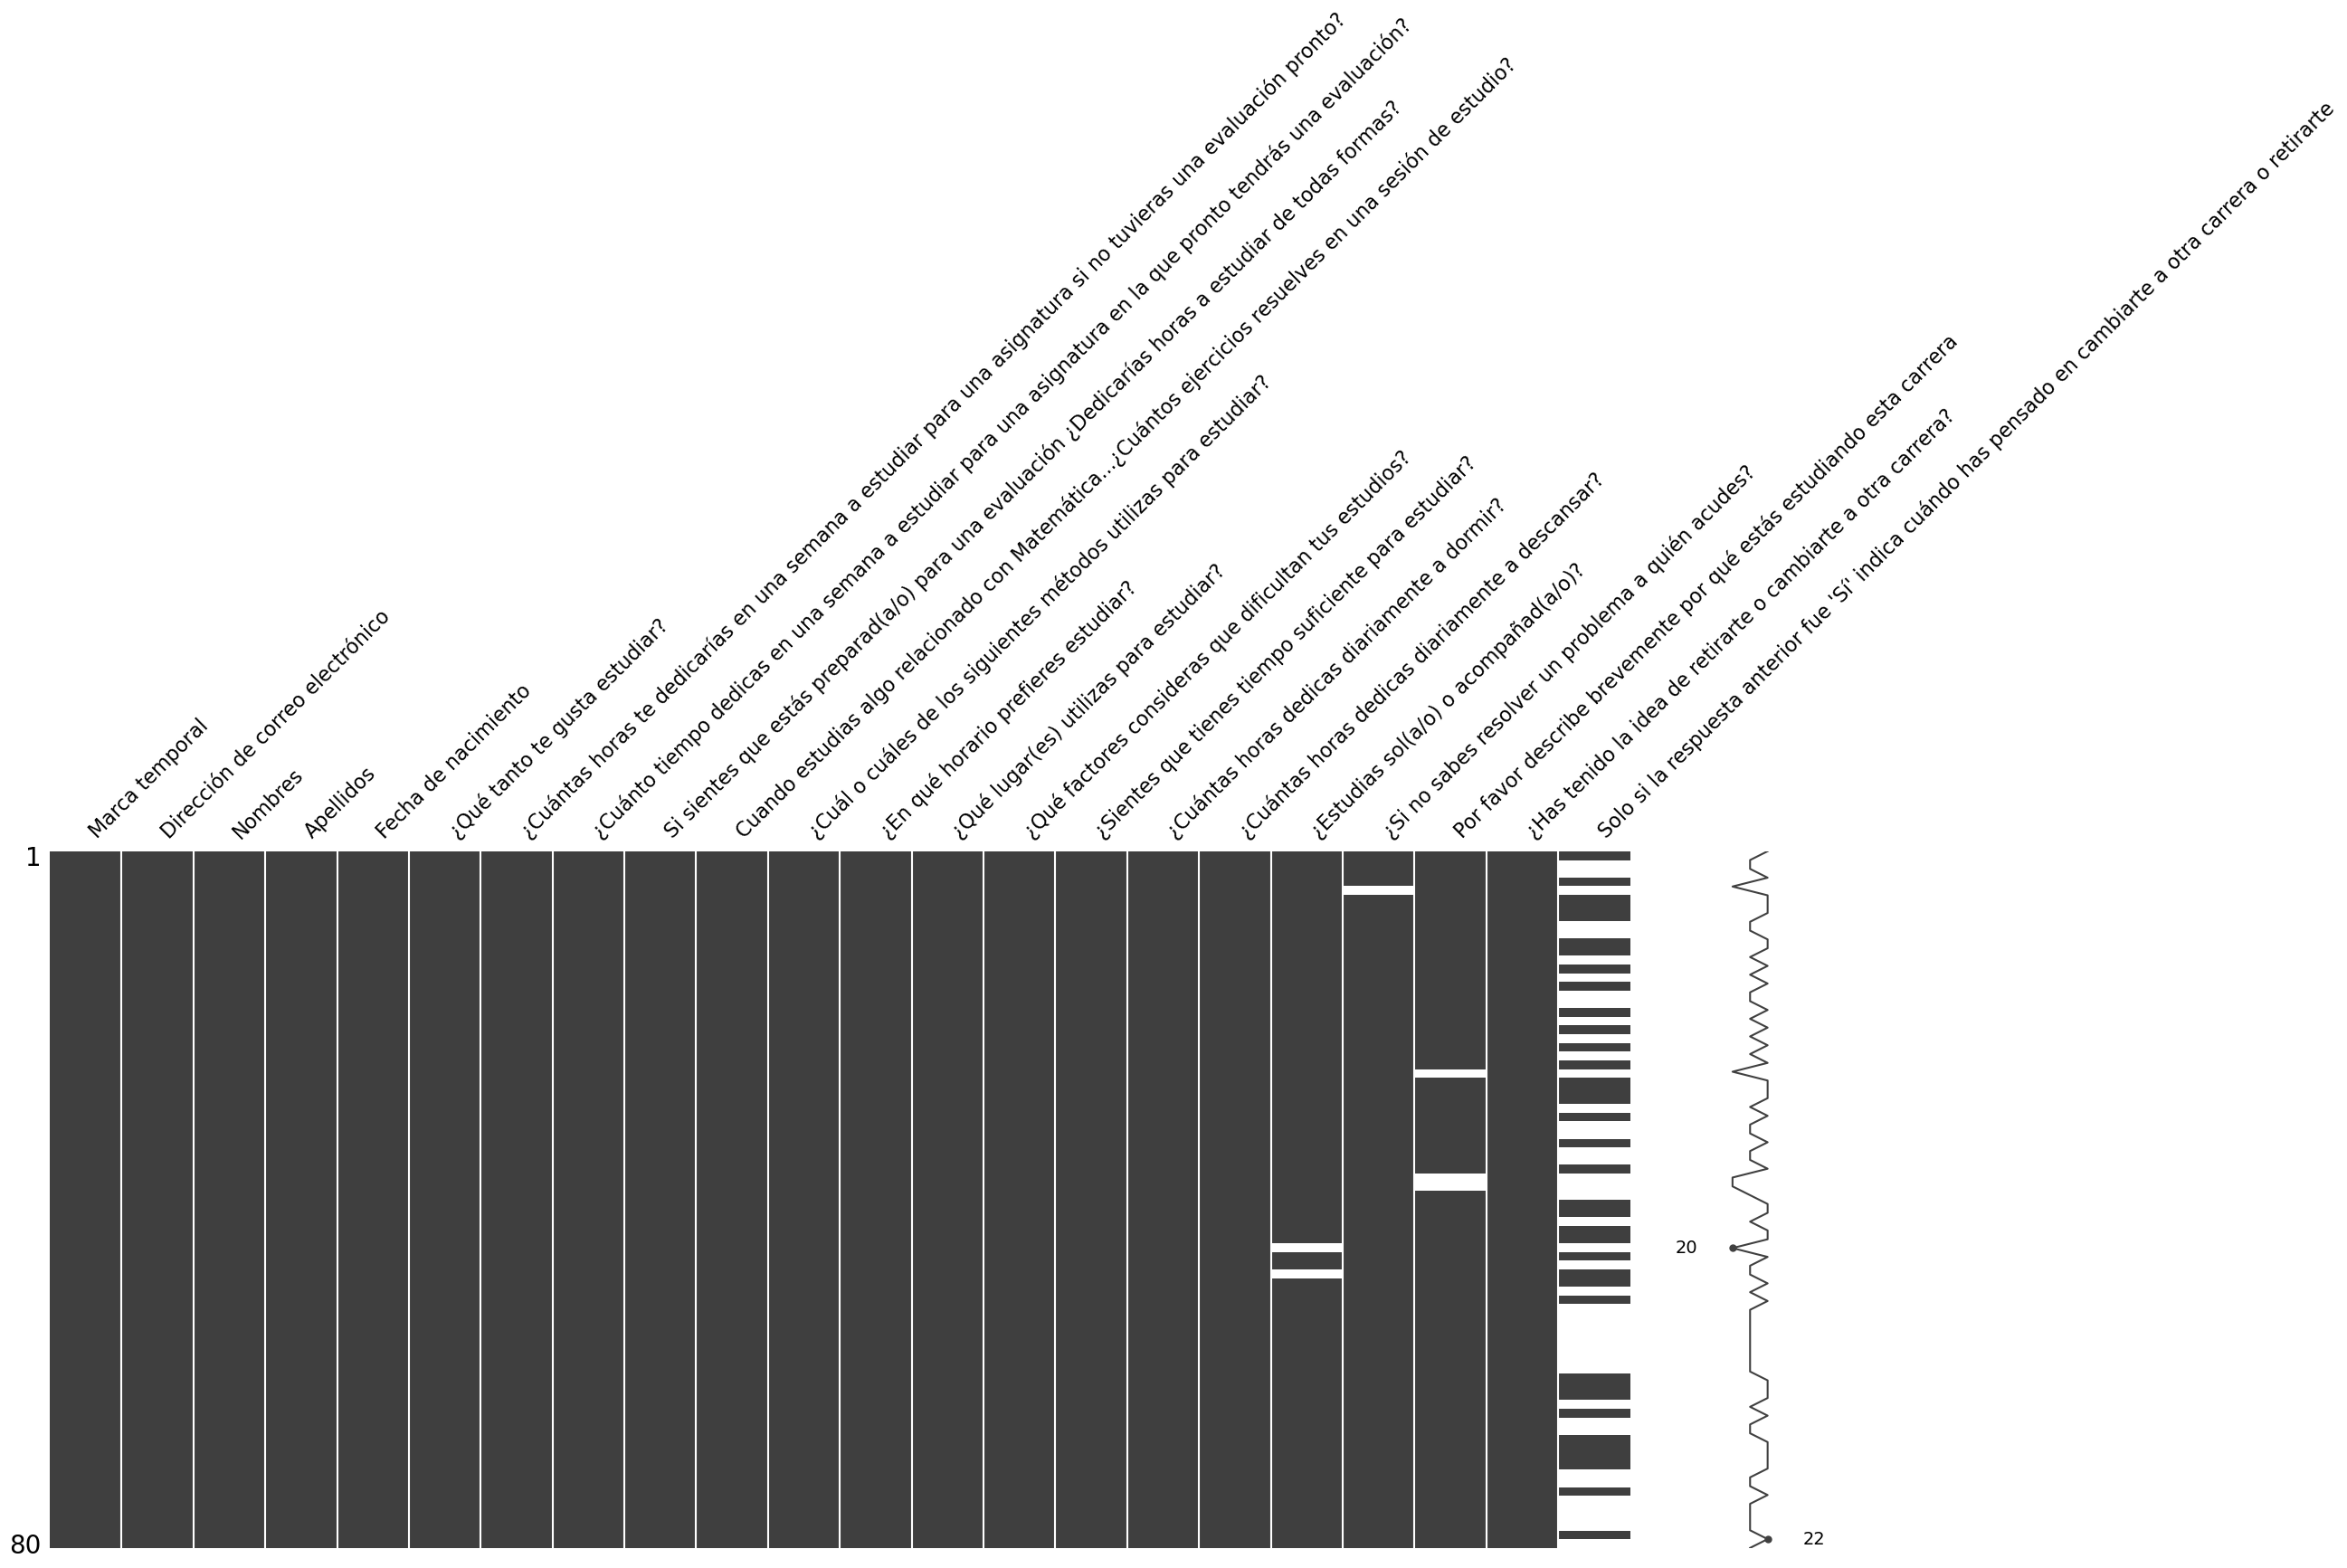

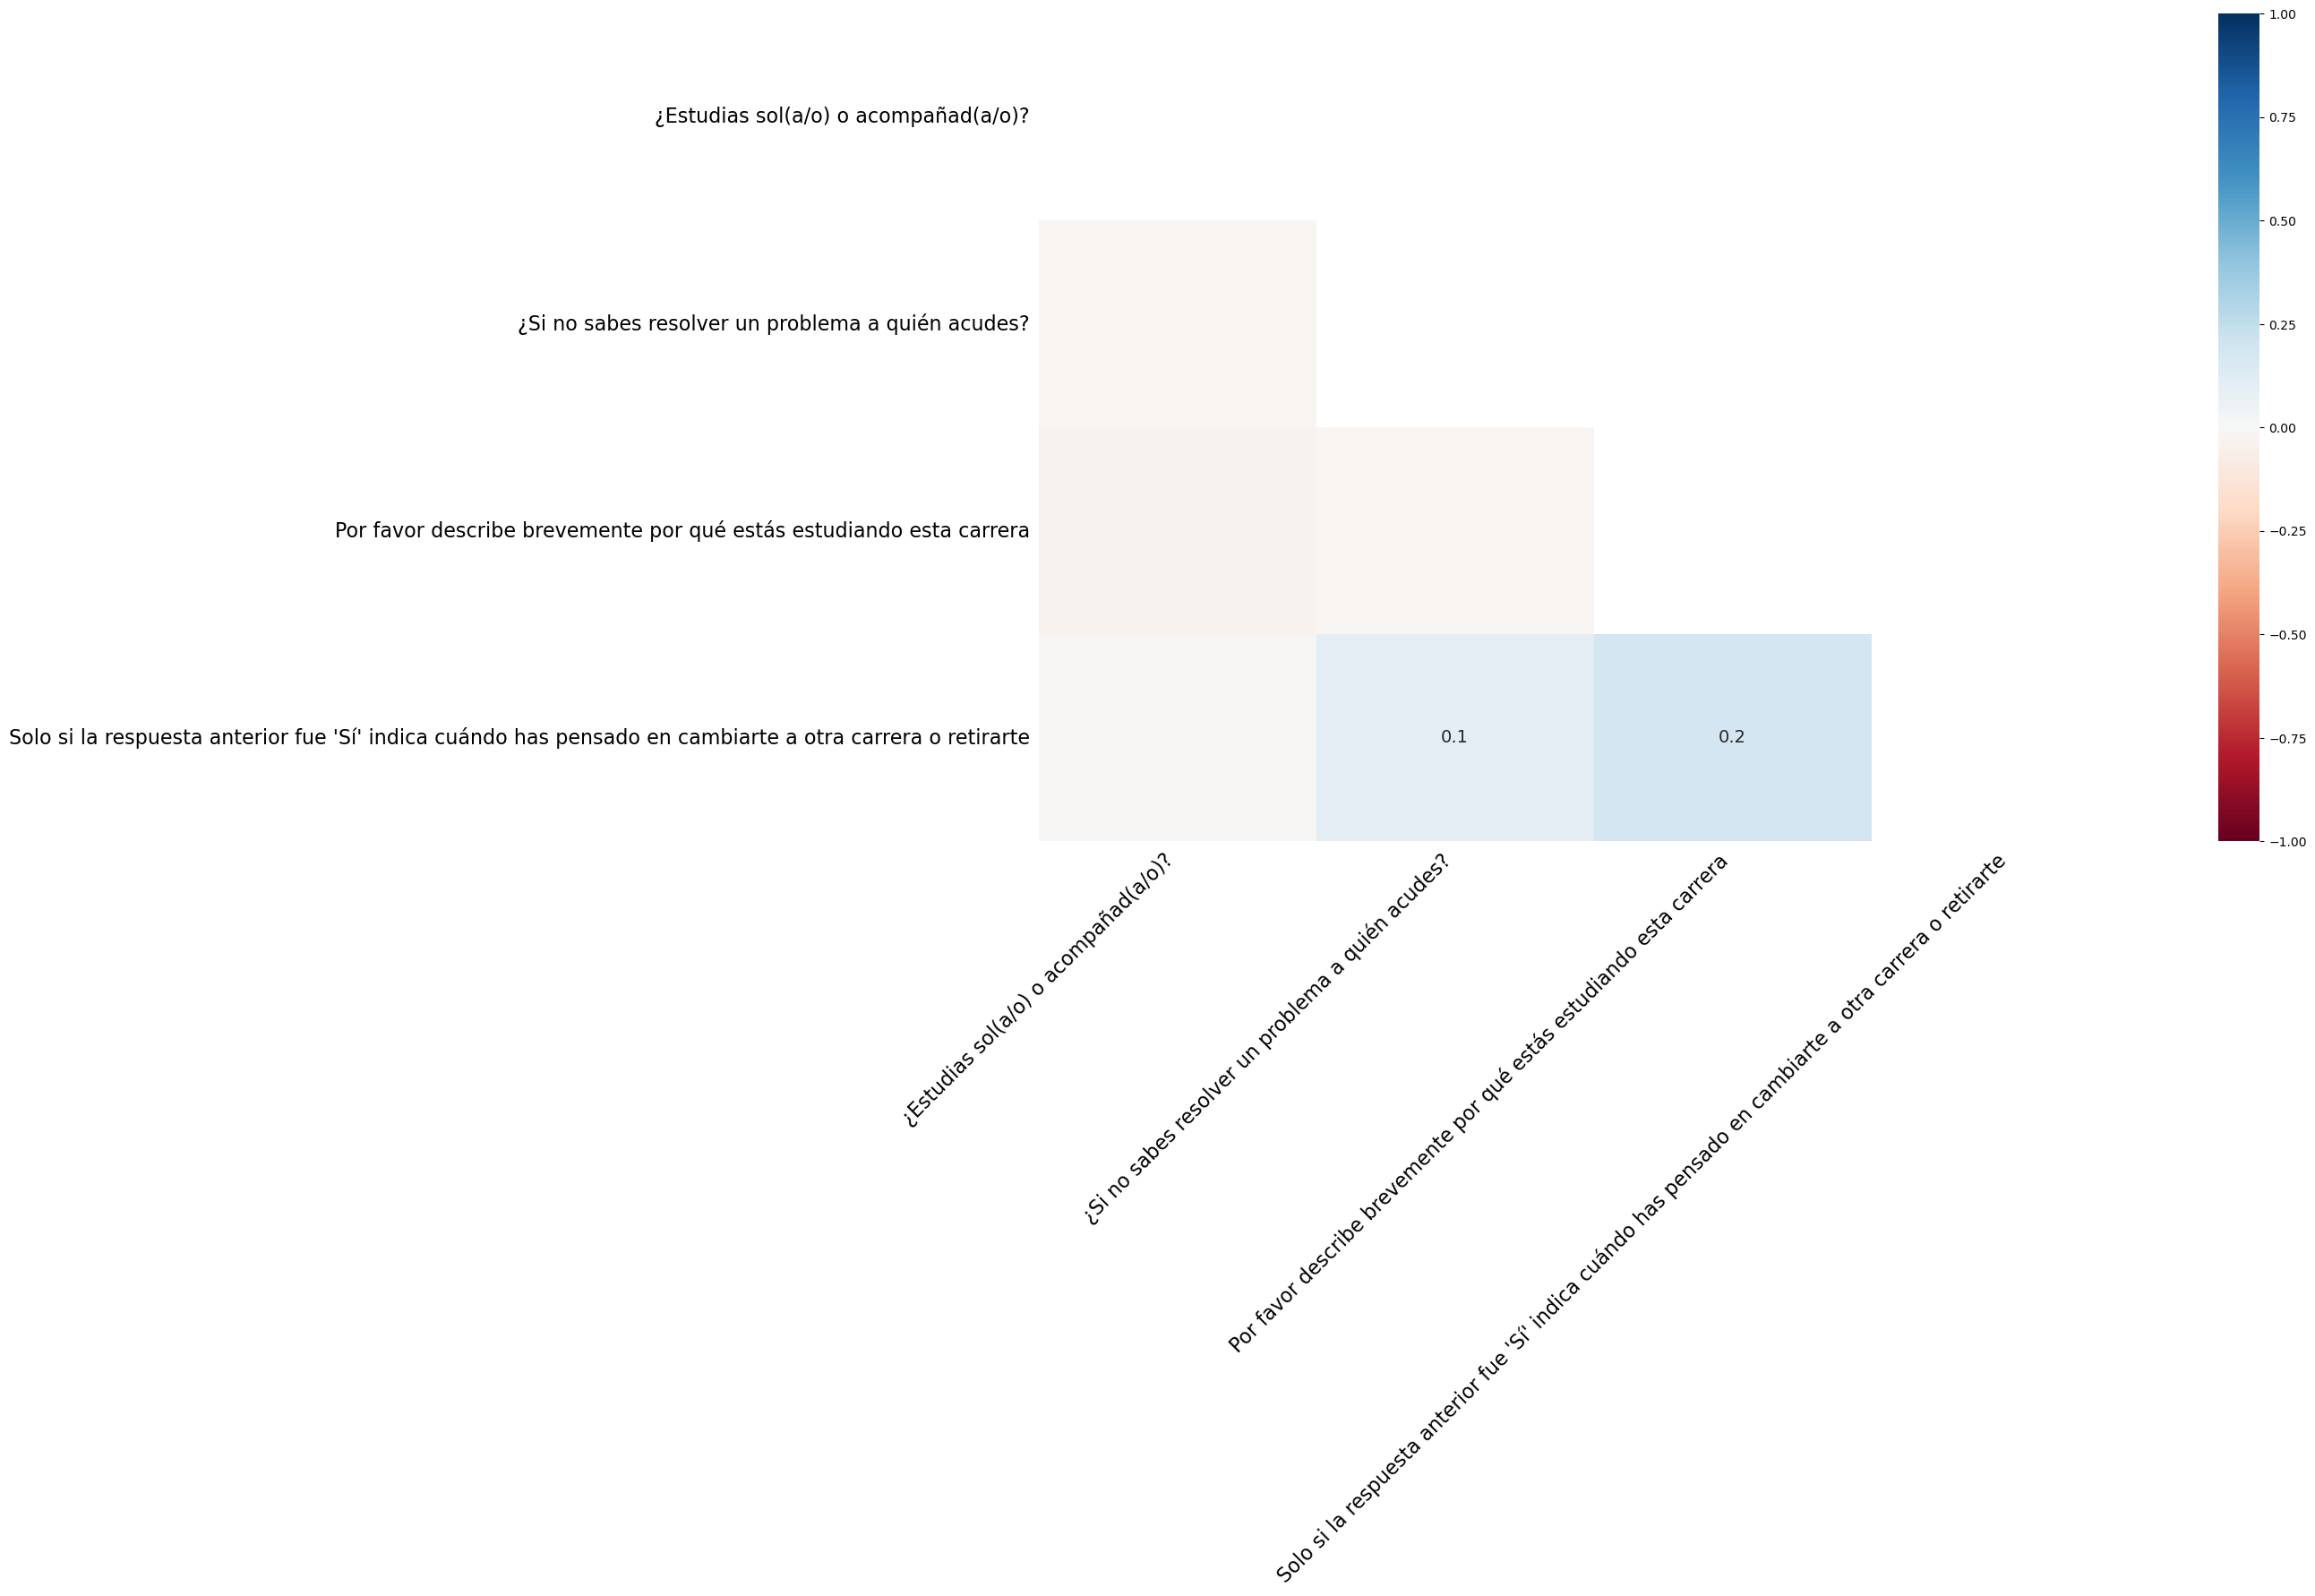

In [6]:
# Visualizar los datos faltantes
msno.matrix(encuesta)
plt.show()
# Visualizar correlaciones entre datos faltantes
msno.heatmap(encuesta)
plt.show()

In [7]:
# Example usage with your DataFrame `encuesta`
utils.test_missing_mcar(encuesta)

Chi2 Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies: [36. 38.  3.  1.  1.  1.]
Result: Cannot reject the null hypothesis. The missing data is MCAR.


## Homologación de valores

### Transformar los valores de las preguntas

In [8]:
# Load encodings
encodings = utils.load_yaml_encodings('../data/raw/diccionario_codigos_respuestas.yaml')

# Process data
encoders = {}
processed_df = utils.process_survey_data(
    df=encuesta,
    encoding_dict=encodings,
    one_hot_encoders=encoders,
    ohe_categorical=False
)

# 

processed_df.iloc[25,8] = 2
processed_df.iloc[8,9] = 3
processed_df.iloc[45,9] = 3

# Display the processed DataFrame
processed_df.head(2).T

,0,1
Marca temporal,9/12/2024 9:53:35,9/12/2024 10:10:46
Dirección de correo electrónico,isidorahuaiquilaf402@gmail.com,valentina.adm.ite@gmail.com
Nombres,Isidora Esperanza,Valentina del carmen
Apellidos,Huaiquilaf Verdugo,Silva ite
Fecha de nacimiento,3/10/2004,13/07/2005
¿Qué tanto te gusta estudiar?,2,3
¿Cuántas horas te dedicarías en una semana a estudiar para una asignatura si no tuvieras una evaluación pronto?,3,3
¿Cuánto tiempo dedicas en una semana a estudiar para una asignatura en la que pronto tendrás una evaluación?,5,2
Si sientes que estás preparad(a/o) para una evaluación ¿Dedicarías horas a estudiar de todas formas?,5,2
Cuando estudias algo relacionado con Matemática...¿Cuántos ejercicios resuelves en una sesión de estudio?,5,1


In [9]:
encuesta.isnull().sum() == processed_df.isnull().sum()

Marca temporal                                                                                                     True
Dirección de correo electrónico                                                                                    True
Nombres                                                                                                            True
Apellidos                                                                                                          True
Fecha de nacimiento                                                                                                True
¿Qué tanto te gusta estudiar?                                                                                      True
¿Cuántas horas te dedicarías en una semana a estudiar para una asignatura si no tuvieras una evaluación pronto?    True
¿Cuánto tiempo dedicas en una semana a estudiar para una asignatura en la que pronto tendrás una evaluación?       True
Si sientes que estás preparad(a/o) para 

### Homologación de valores en la variable target

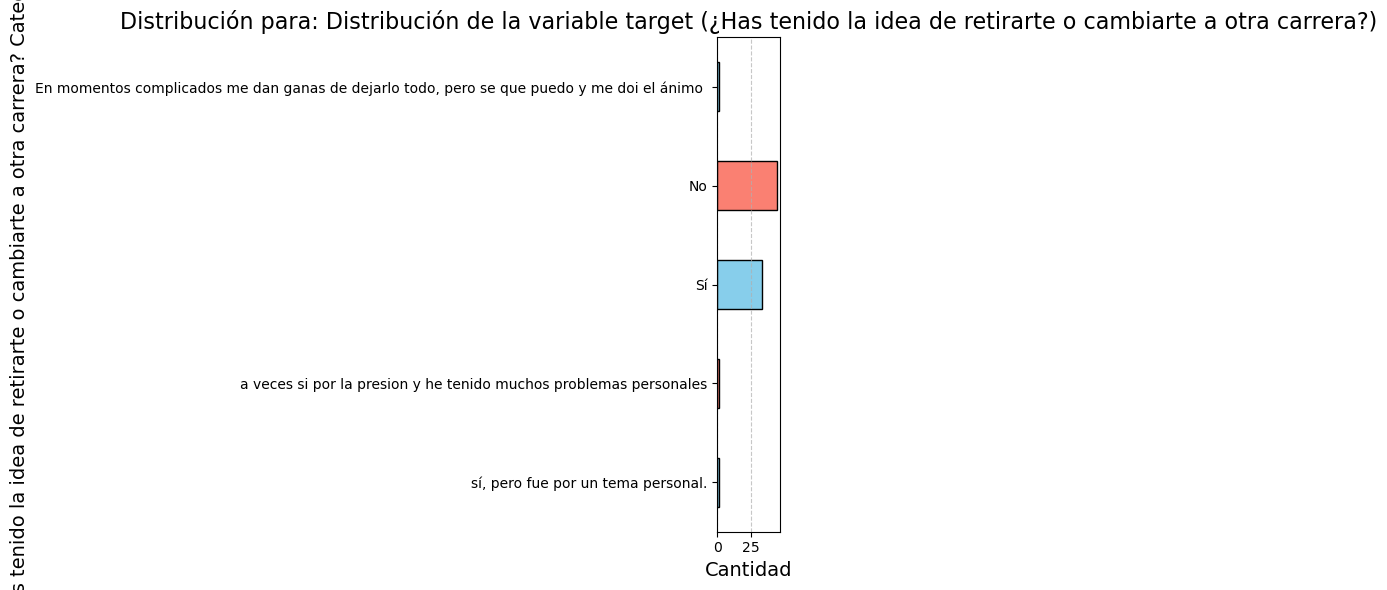

In [10]:
# Call the function with P5 as an example
utils.plot_distribution(
    df=processed_df, 
    variable_name="¿Has tenido la idea de retirarte o cambiarte a otra carrera?", 
    question_text='Distribución de la variable target',
    horizontal=True
)

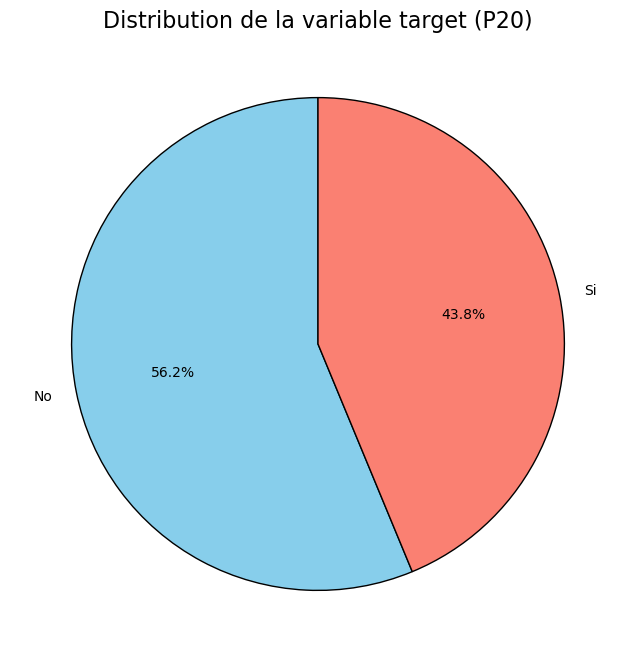

In [11]:
# Normalize and transform P20
def transform_p20(response):
    # Normalize the text (lowercase, remove accents)
    normalized_response = unidecode.unidecode(str(response).strip().lower())
    
    # Return directly if already "sí" or "no"
    if normalized_response in ['si', 'no']:
        return normalized_response.capitalize()
    
    # Check for the presence of "si"
    if 'si' in normalized_response:
        return 'Si'
    else:
        return 'No'
    
# Apply transformation to P20
encuesta["¿Has tenido la idea de retirarte o cambiarte a otra carrera?"] = encuesta["¿Has tenido la idea de retirarte o cambiarte a otra carrera?"].apply(transform_p20)
# Apply transformation to processed_df
processed_df["¿Has tenido la idea de retirarte o cambiarte a otra carrera?"] = encuesta["¿Has tenido la idea de retirarte o cambiarte a otra carrera?"].map({'Si': 1, 'No': 0})
# Calculate the value counts and percentages
target_counts = encuesta["¿Has tenido la idea de retirarte o cambiarte a otra carrera?"].value_counts(normalize=True) * 100
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution de la variable target (P20)', fontsize=16)
plt.show()

### Calcular la fecha de nacimiento

In [12]:
processed_df['Fecha de nacimiento'] = processed_df['Fecha de nacimiento'].apply(utils.calculate_age)

## Homologar nombres de variables

In [13]:
# Load the JSON file
with open(__path__ + 'diccionario_nombre_variables.json', 'r') as file:
    diccionario = json.load(file)

# Extract the mapping (preguntas -> P codes)
preguntas_mapping = {v['pregunta']: k for k, v in diccionario.items()}
# Rename columns
encuesta.rename(columns=preguntas_mapping, inplace=True)
print(encuesta.info())
encuesta.head(3).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P0      80 non-null     object
 1   P1      80 non-null     object
 2   P2      80 non-null     object
 3   P3      80 non-null     object
 4   P4      80 non-null     object
 5   P5      80 non-null     int64 
 6   P6      80 non-null     object
 7   P7      80 non-null     object
 8   P8      80 non-null     object
 9   P9      80 non-null     object
 10  P10     80 non-null     object
 11  P11     80 non-null     object
 12  P12     80 non-null     object
 13  P13     80 non-null     object
 14  P14     80 non-null     int64 
 15  P15     80 non-null     object
 16  P16     80 non-null     object
 17  P17     78 non-null     object
 18  P18     79 non-null     object
 19  P19     77 non-null     object
 20  P20     80 non-null     object
 21  P21     37 non-null     object
dtypes: int64(2), object(20)
memo

,0,1,2
P0,9/12/2024 9:53:35,9/12/2024 10:10:46,9/12/2024 10:12:27
P1,isidorahuaiquilaf402@gmail.com,valentina.adm.ite@gmail.com,aljaque@alumnos.uahurtado.cl
P2,Isidora Esperanza,Valentina del carmen,Alexis Alexander
P3,Huaiquilaf Verdugo,Silva ite,Jaque Cardenas
P4,3/10/2004,13/07/2005,30/06/2006
P5,2,3,4
P6,Entre una y dos horas,Entre una y dos horas,Estudiaría hasta que sienta que estoy preparad...
P7,Estudio hasta que siento que estoy preparad(a/...,Entre una y dos horas,Entre 4 y 7 horas
P8,Definitivamente sí,Tal vez,Definitivamente sí
P9,Todos los necesarios (hasta que siento que est...,Ninguno. Solo reviso el material,Todos los necesarios (hasta que siento que est...


In [14]:
# Load the JSON file
with open(__path__ + 'diccionario_nombre_variables.json', 'r') as file:
    diccionario = json.load(file)

# Extract the mapping (preguntas -> P codes)
preguntas_mapping = {v['pregunta']: k for k, v in diccionario.items()}
# Rename columns
processed_df.rename(columns=preguntas_mapping, inplace=True)
print(processed_df.info())
processed_df.head(3).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P0      80 non-null     object
 1   P1      80 non-null     object
 2   P2      80 non-null     object
 3   P3      80 non-null     object
 4   P4      80 non-null     int64 
 5   P5      80 non-null     int64 
 6   P6      80 non-null     int64 
 7   P7      80 non-null     int64 
 8   P8      80 non-null     int64 
 9   P9      80 non-null     object
 10  P10     80 non-null     object
 11  P11     80 non-null     object
 12  P12     80 non-null     object
 13  P13     80 non-null     object
 14  P14     80 non-null     int64 
 15  P15     80 non-null     object
 16  P16     80 non-null     object
 17  P17     78 non-null     object
 18  P18     79 non-null     object
 19  P19     77 non-null     object
 20  P20     80 non-null     int64 
 21  P21     37 non-null     object
dtypes: int64(7), object(15)
memo

,0,1,2
P0,9/12/2024 9:53:35,9/12/2024 10:10:46,9/12/2024 10:12:27
P1,isidorahuaiquilaf402@gmail.com,valentina.adm.ite@gmail.com,aljaque@alumnos.uahurtado.cl
P2,Isidora Esperanza,Valentina del carmen,Alexis Alexander
P3,Huaiquilaf Verdugo,Silva ite,Jaque Cardenas
P4,20,19,18
P5,2,3,4
P6,3,3,6
P7,5,2,4
P8,5,2,5
P9,5,1,5


## Análisis bi-variable con respecto al target

#### Distribución para las preguntas de hábitos de estudio

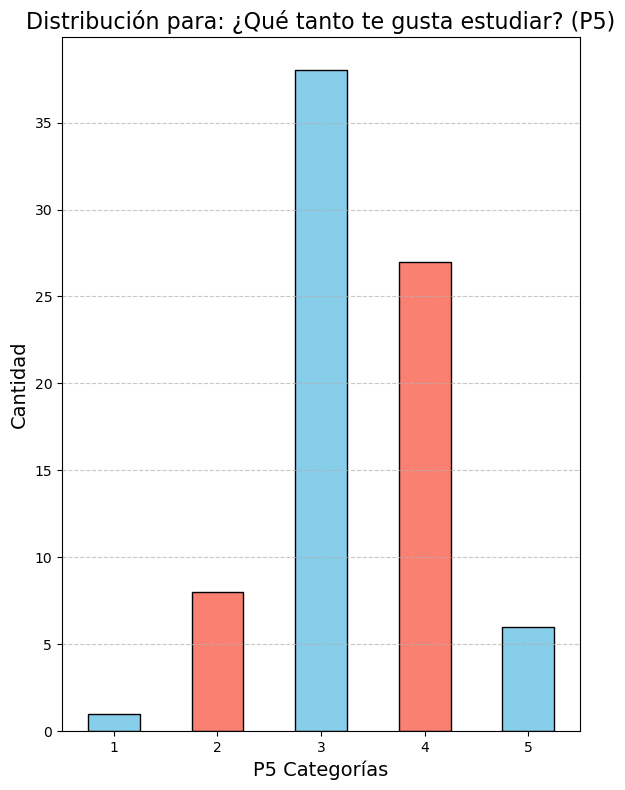

In [15]:
# Call the function with P5 as an example
utils.plot_distribution(
    df=processed_df, 
    variable_name='P5', 
    question_text='¿Qué tanto te gusta estudiar?',
    horizontal=False,
    ascending=True
)

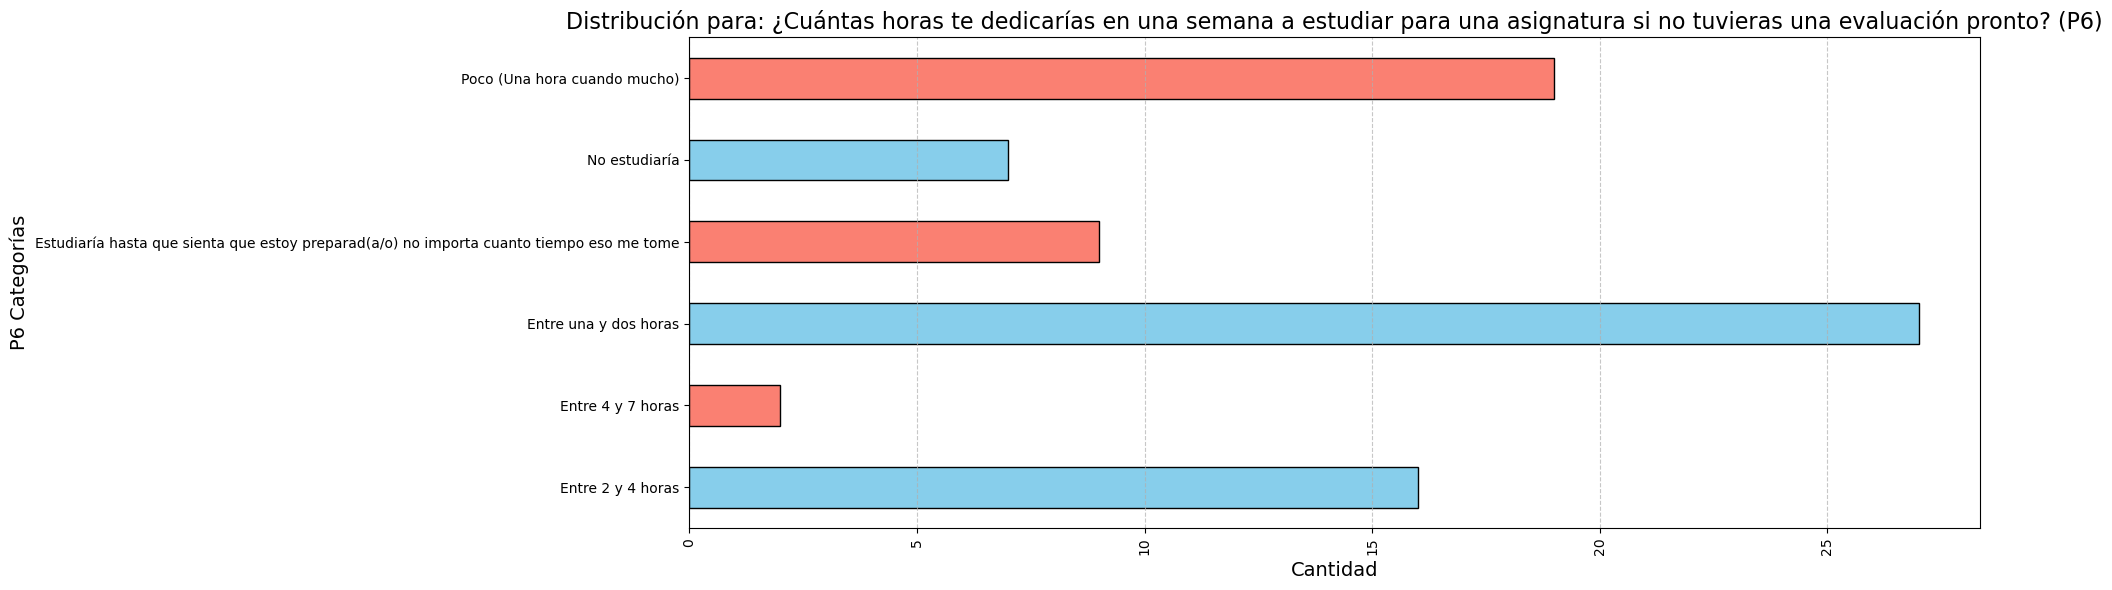

In [16]:
# Call the function with P5 as an example
utils.plot_distribution(
    df=encuesta,
    variable_name='P6', 
    question_text='¿Cuántas horas te dedicarías en una semana a estudiar para una asignatura si no tuvieras una evaluación pronto?',
    rotation=90,
    #horizontal=False,
    figsize=(20,6),
    ascending=True
)

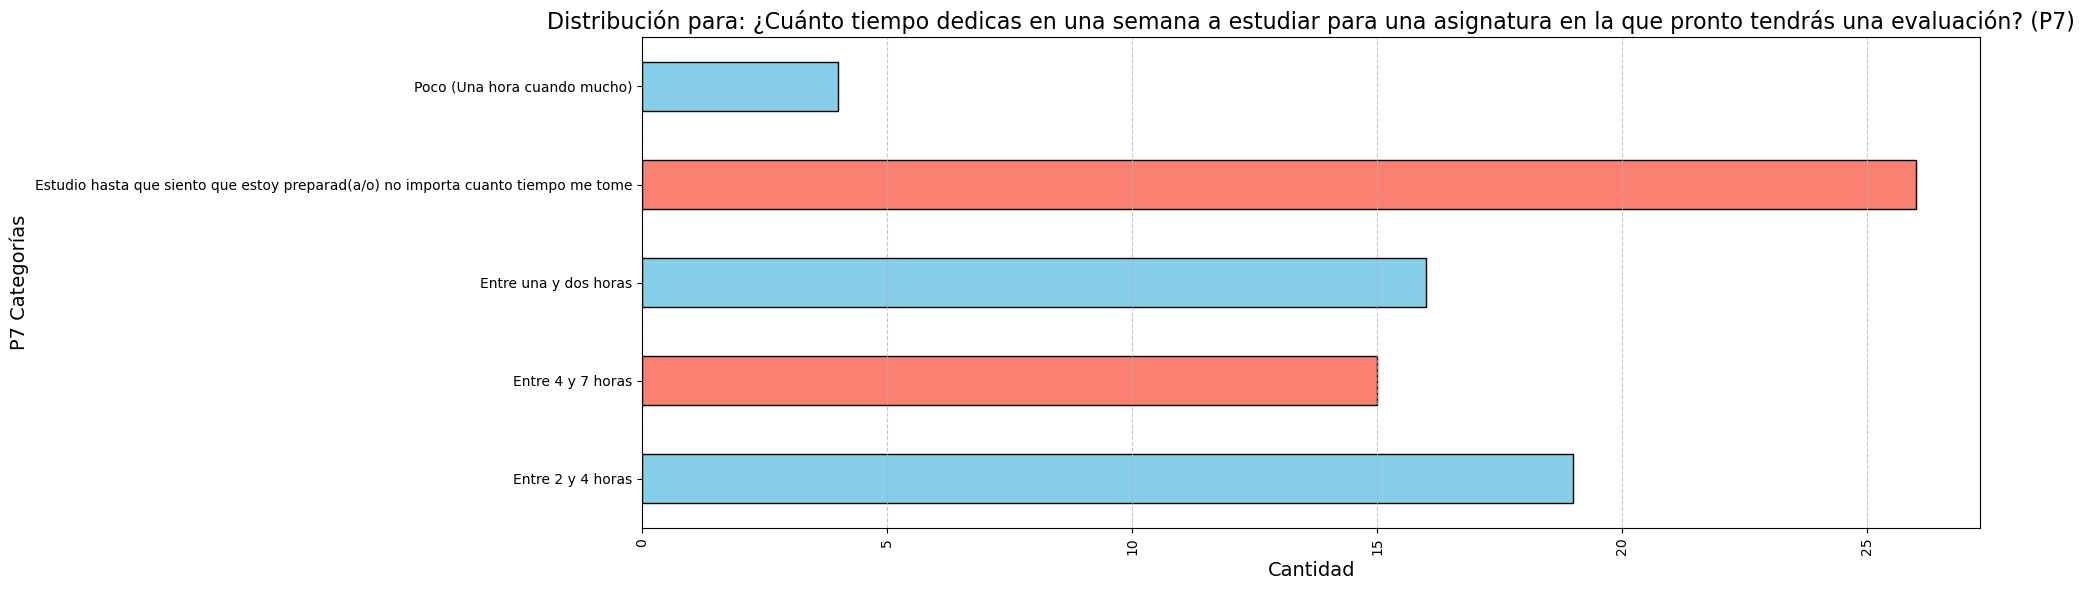

In [17]:
utils.plot_distribution(
    df=encuesta, 
    variable_name='P7', 
    question_text="¿Cuánto tiempo dedicas en una semana a estudiar para una asignatura en la que pronto tendrás una evaluación?",
    rotation=90,
    #horizontal=False,
    figsize=(20,6),
    ascending=True
)

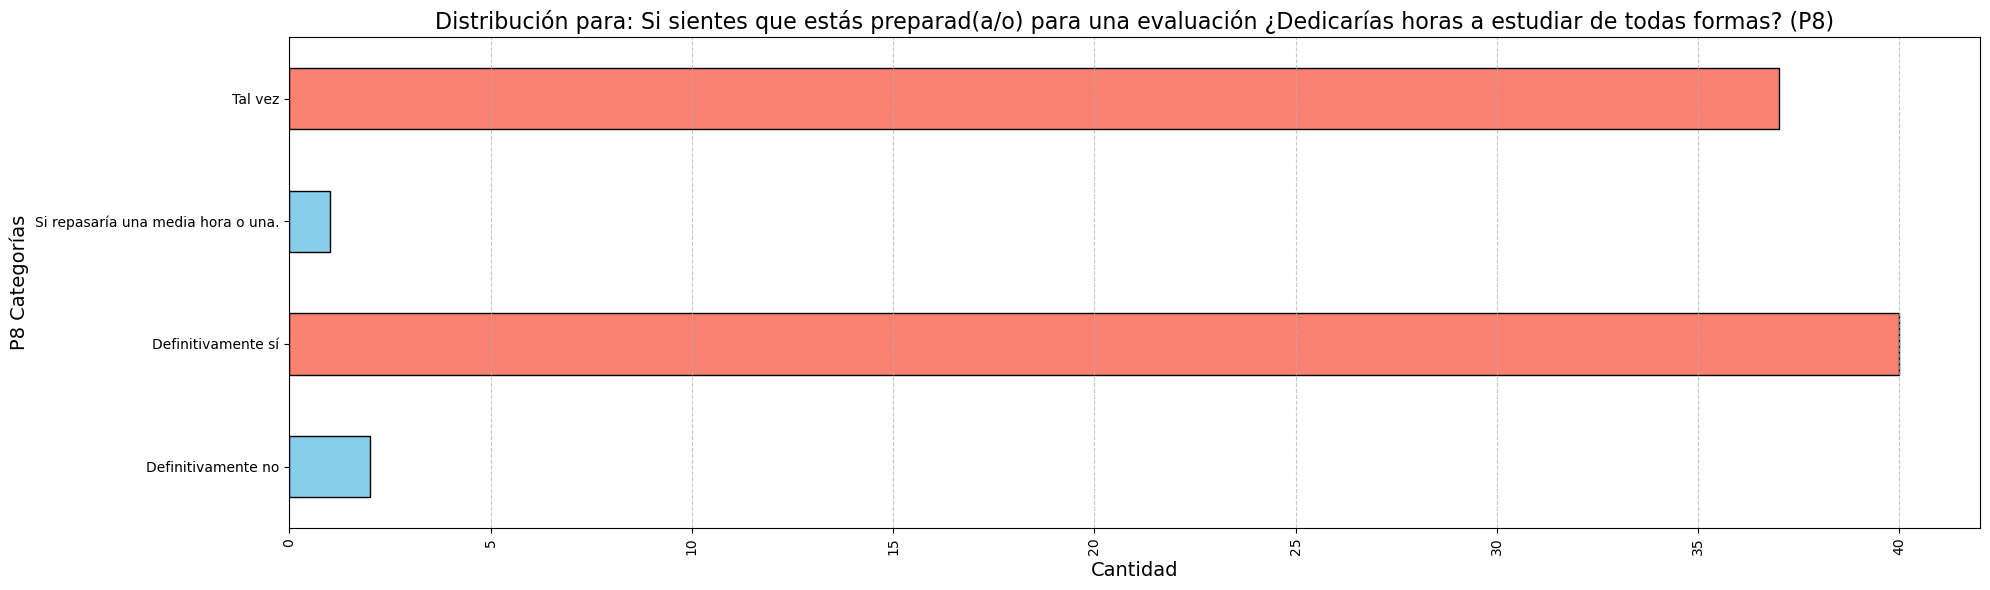

In [18]:
# Call the function with P5 as an example
utils.plot_distribution(
    df=encuesta, 
    variable_name='P8', 
    question_text="Si sientes que estás preparad(a/o) para una evaluación ¿Dedicarías horas a estudiar de todas formas?",
    rotation=90,
    #horizontal=False,
    figsize=(20,6),
    ascending=True
)

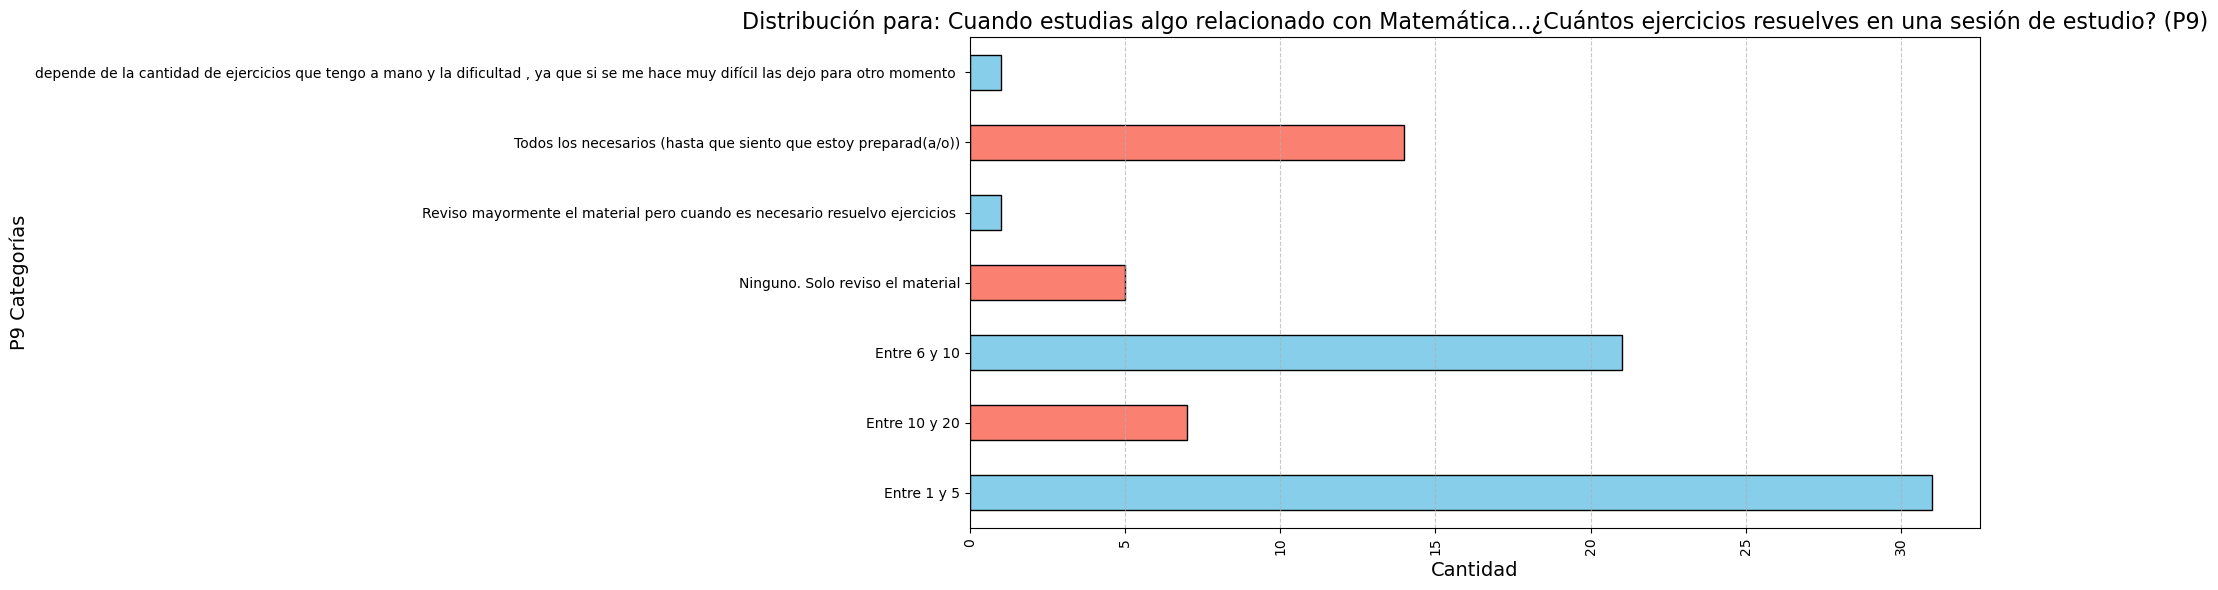

In [19]:
utils.plot_distribution(
    df=encuesta, 
    variable_name='P9', 
    question_text= "Cuando estudias algo relacionado con Matemática...¿Cuántos ejercicios resuelves en una sesión de estudio?",
    rotation=90,
    #horizontal=False,
    figsize=(20,6),
    ascending=True
)

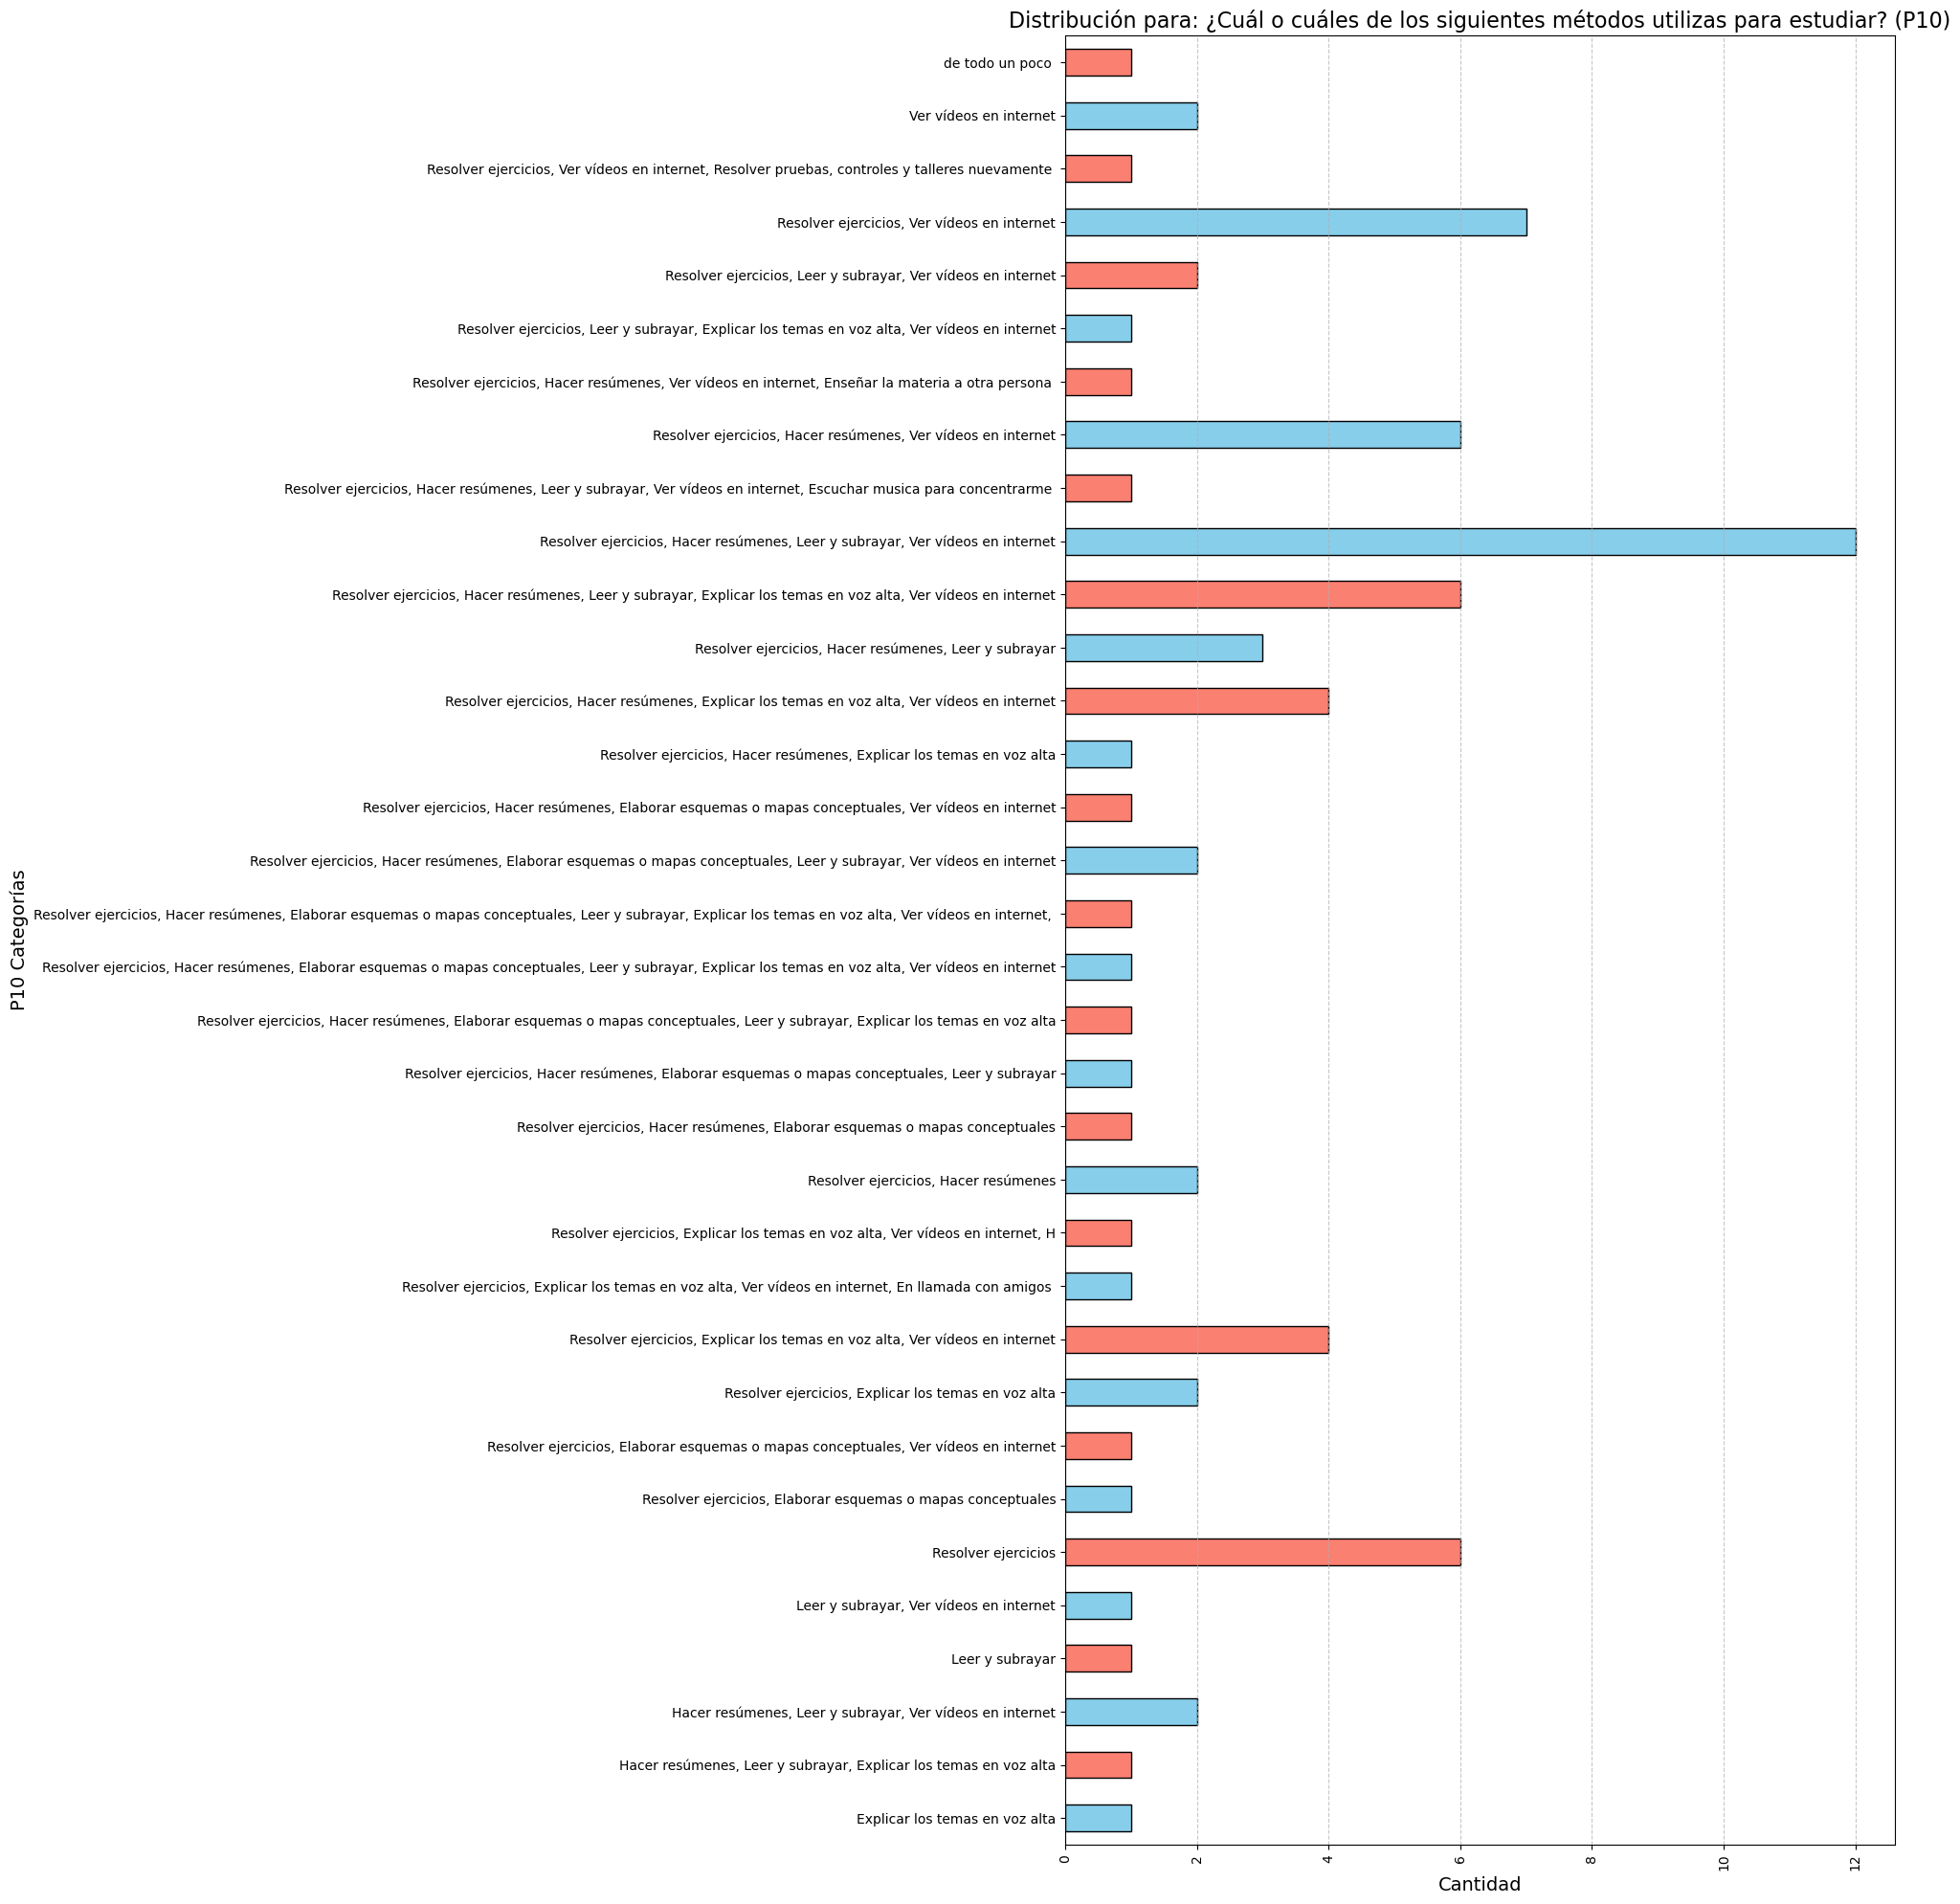

In [20]:
utils.plot_distribution(
    df=encuesta, 
    variable_name='P10', 
    question_text= "¿Cuál o cuáles de los siguientes métodos utilizas para estudiar?",
    rotation=90,
    #horizontal=False,
    figsize=(20,20),
    ascending=True
)

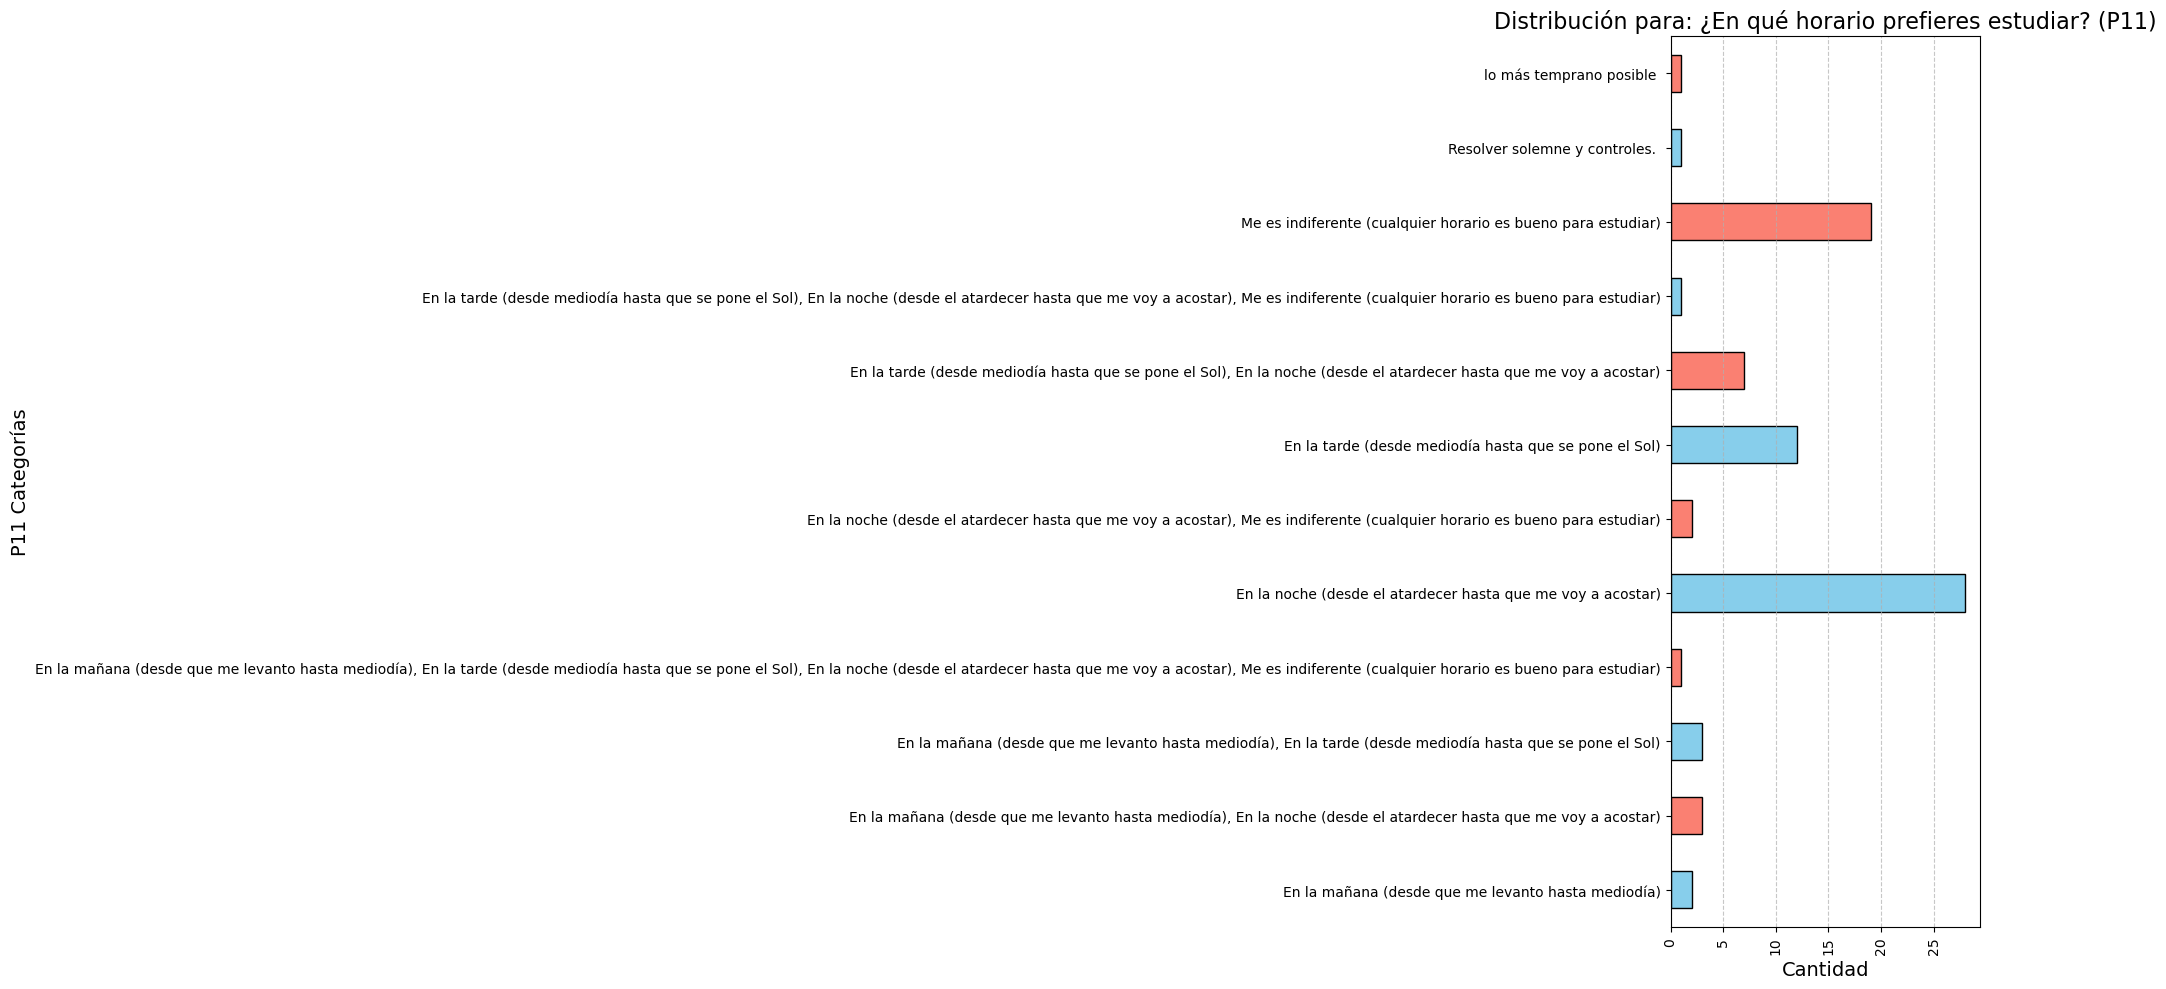

In [21]:
utils.plot_distribution(
    df=encuesta, 
    variable_name='P11', 
    question_text= "¿En qué horario prefieres estudiar?",
    rotation=90,
    #horizontal=False,
    figsize=(20,10),
    ascending=True
)

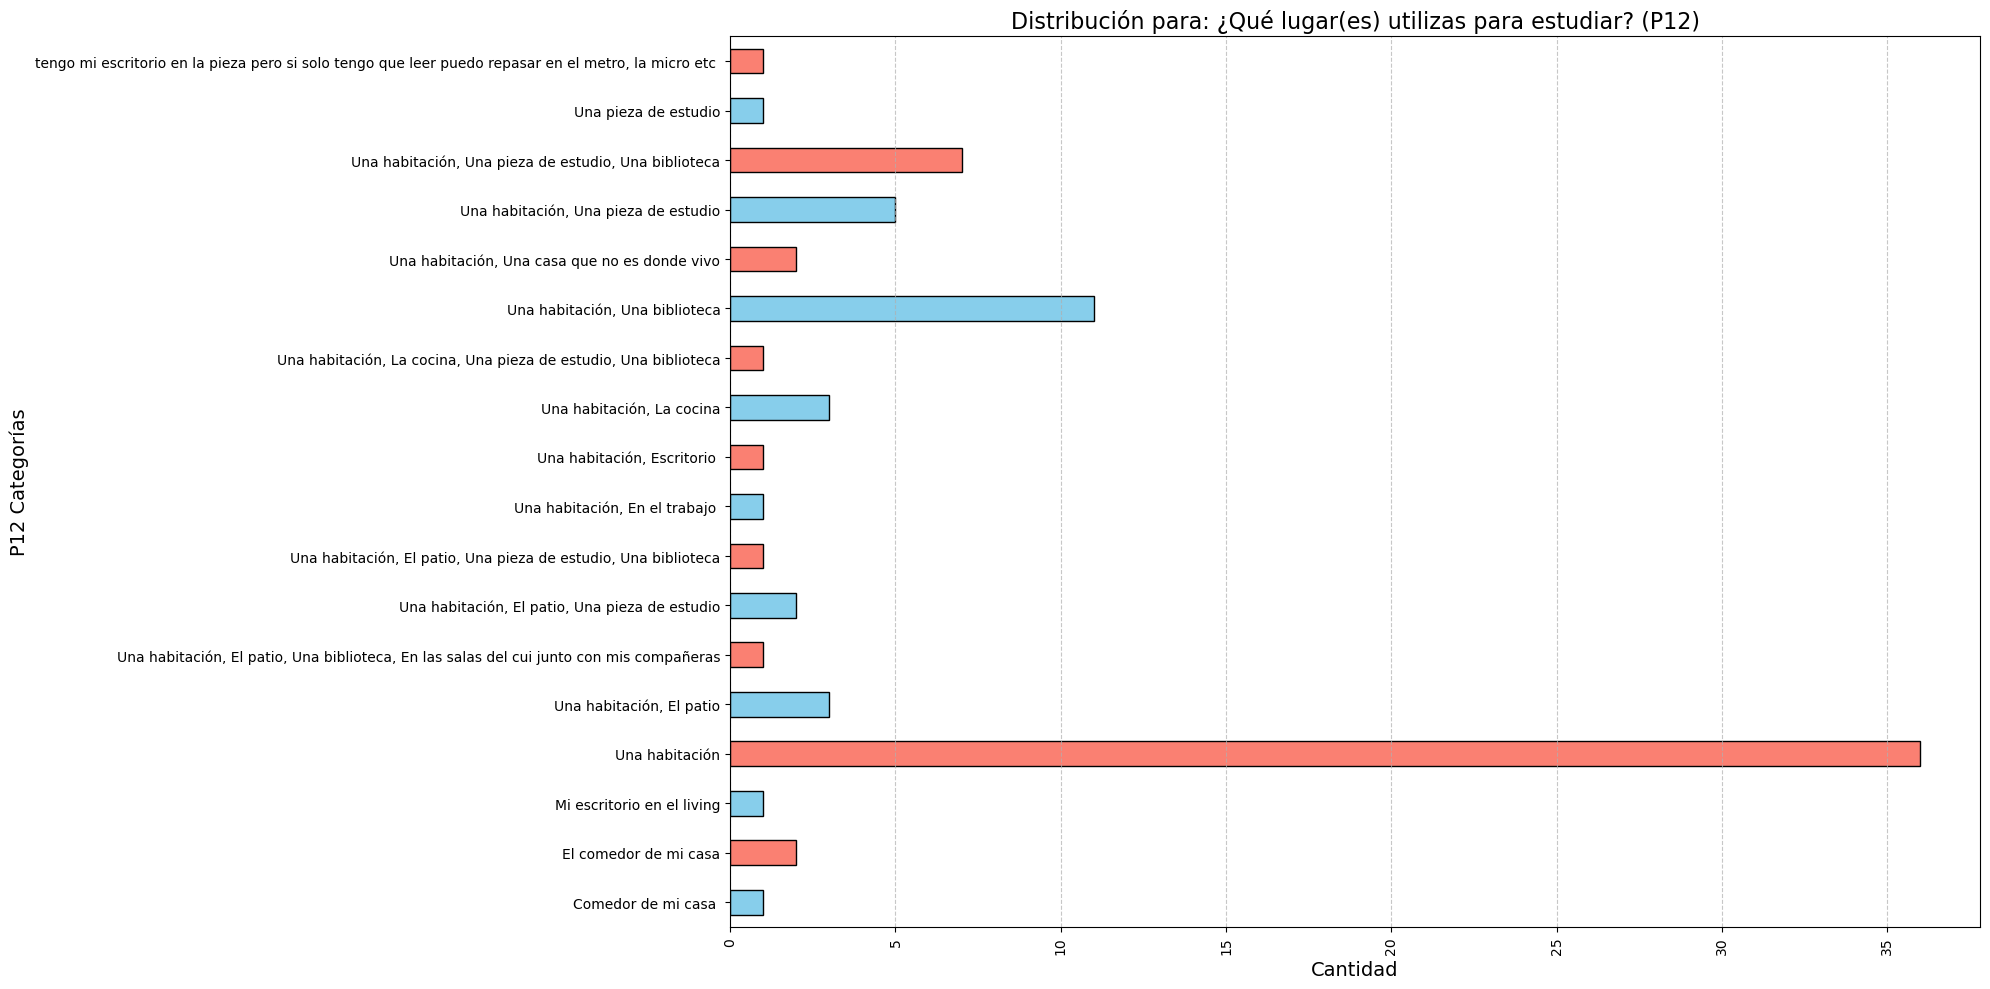

In [22]:
utils.plot_distribution(
    df=encuesta, 
    variable_name='P12', 
    question_text= "¿Qué lugar(es) utilizas para estudiar?",
    rotation=90,
    #horizontal=False,
    figsize=(20,10),
    ascending=True
)

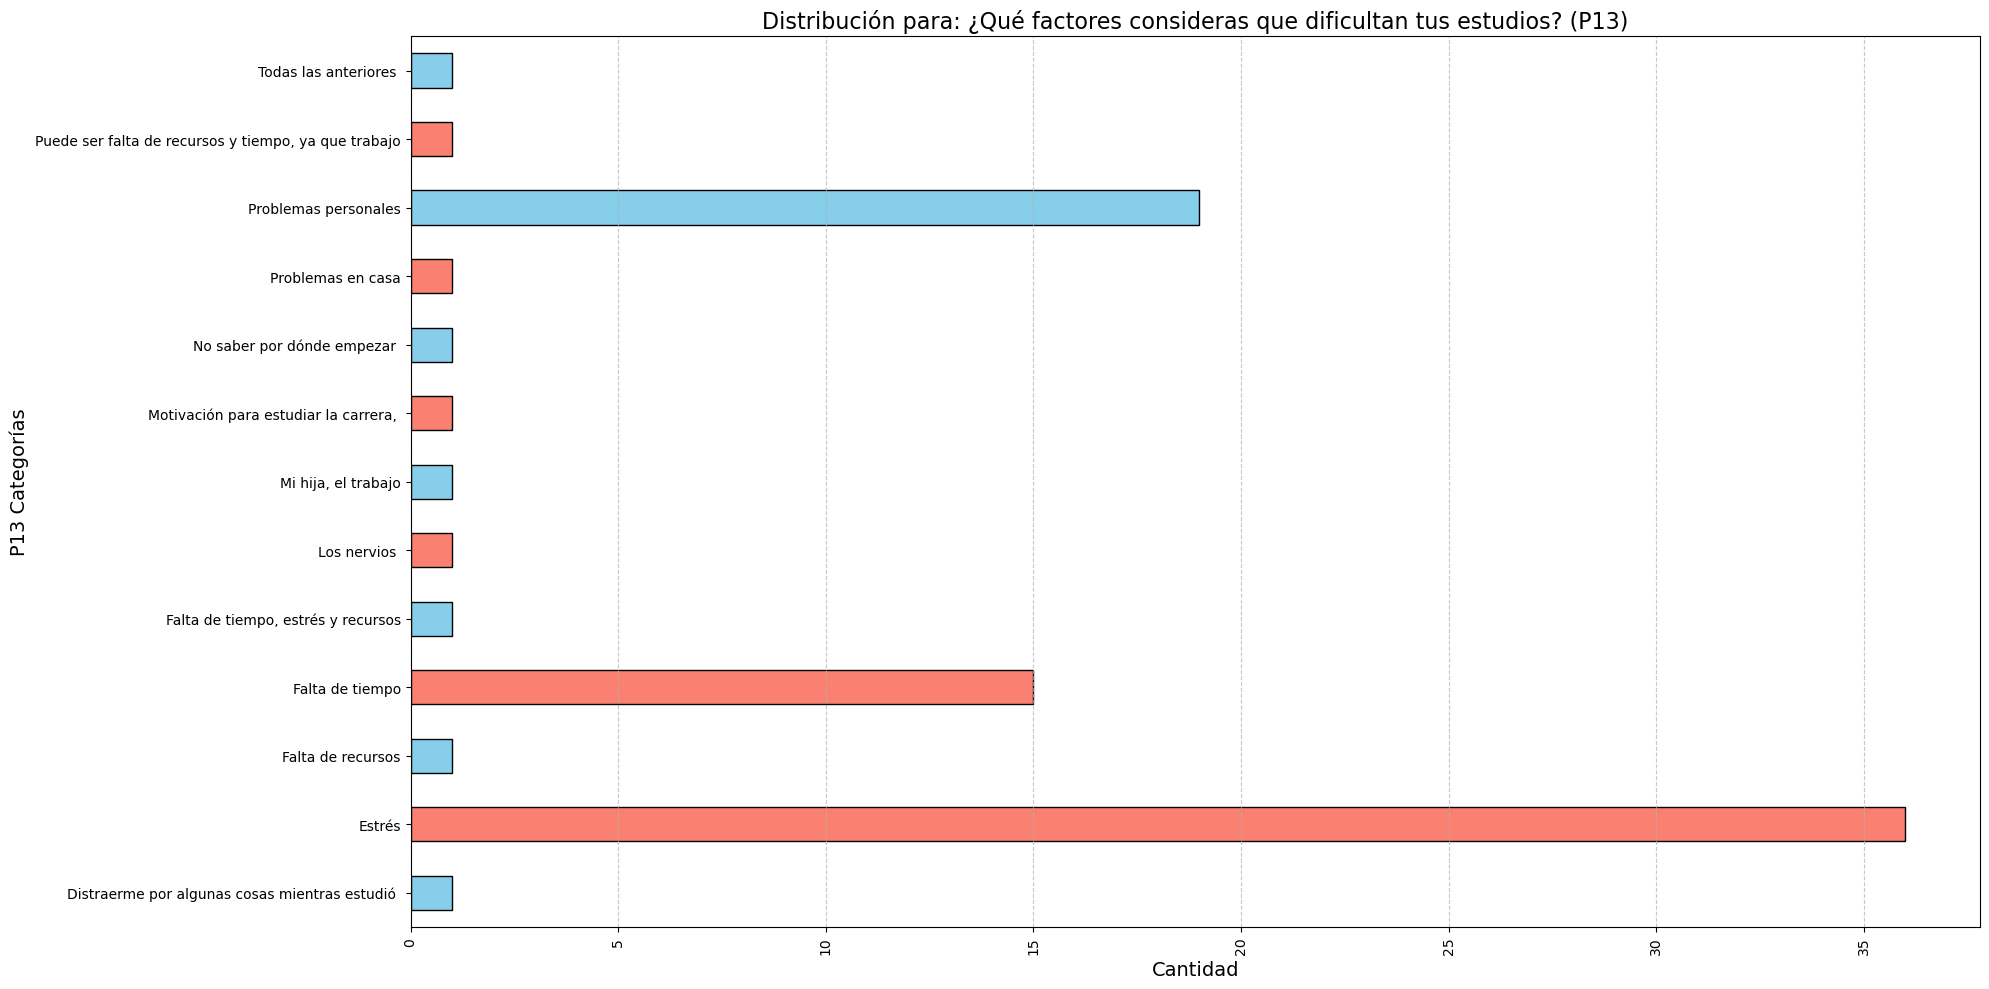

In [23]:
utils.plot_distribution(
    df=encuesta, 
    variable_name='P13', 
    question_text= "¿Qué factores consideras que dificultan tus estudios?",
    rotation=90,
    #horizontal=False,
    figsize=(20,10),
    ascending=True
)

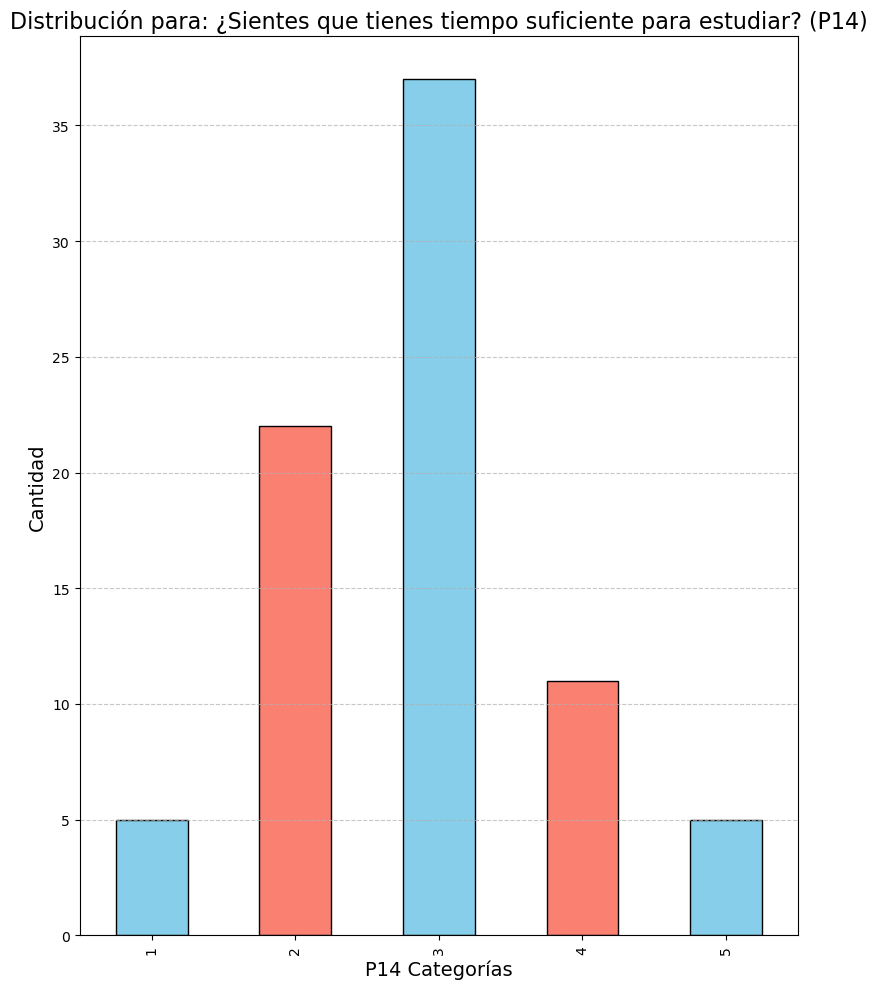

In [24]:
utils.plot_distribution(
    df=encuesta, 
    variable_name='P14', 
    question_text= "¿Sientes que tienes tiempo suficiente para estudiar?",
    rotation=90,
    horizontal=False,
    figsize=(10,8),
    ascending=True
)

### Test estadísticos con variables asociadas a hábitos de estudio

In [25]:
from scipy import stats

def rank_biserial_correlation(likert_var, binary_var):
    return stats.pointbiserialr(binary_var, likert_var)[0]

def interpret_rank_biserial(correlation):
   """
   Interprets rank-biserial correlation coefficient.
   """
   strength = ""
   if abs(correlation) < 0.2: strength = "Very weak"
   elif abs(correlation) < 0.4: strength = "Weak"
   elif abs(correlation) < 0.6: strength = "Moderate"
   elif abs(correlation) < 0.8: strength = "Strong" 
   else: strength = "Very strong"
   
   direction = "positive" if correlation > 0 else "negative"
   
   return f"Correlation: {correlation:.3f}\nStrength: {strength}\nDirection: {direction}"

# Convert columns P4-P9 and P14 to int64
columns_to_convert = [f'P{i}' for i in range(4, 10)] + ['P14']
processed_df[columns_to_convert] = processed_df[columns_to_convert].astype('int64')
for question in range(5, 10):
   col_name = f'P{question}'
   if col_name in processed_df.columns:
       result = rank_biserial_correlation(processed_df[col_name].values, processed_df.P20.values)
       print(f"\nQuestion {col_name}:")
       print(interpret_rank_biserial(result))
result = rank_biserial_correlation(processed_df['P14'].values, processed_df.P20.values)
print(f"\nQuestion {'P14'}:")
print(interpret_rank_biserial(result))


Question P5:
Correlation: -0.270
Strength: Weak
Direction: negative

Question P6:
Correlation: -0.316
Strength: Weak
Direction: negative

Question P7:
Correlation: -0.116
Strength: Very weak
Direction: negative

Question P8:
Correlation: -0.027
Strength: Very weak
Direction: negative

Question P9:
Correlation: 0.204
Strength: Weak
Direction: positive

Question P14:
Correlation: 0.048
Strength: Very weak
Direction: positive


In [26]:
from scipy import stats

def mann_whitney_test(likert_var, binary_var):
   group_0 = likert_var[binary_var == 0]
   group_1 = likert_var[binary_var == 1]
   return stats.mannwhitneyu(group_0, group_1, alternative='two-sided')

def interpret_mann_whitney(statistic, pvalue, n1, n2):
   """
   Interprets Mann-Whitney U test results
   """
   effect_size = 1 - (2 * statistic)/(n1 * n2)  # Common language effect size
   
   strength = ""
   if abs(effect_size) < 0.2: strength = "Very weak"
   elif abs(effect_size) < 0.4: strength = "Weak"
   elif abs(effect_size) < 0.6: strength = "Moderate"
   elif abs(effect_size) < 0.8: strength = "Strong"
   else: strength = "Very strong"
   
   significance = "significant" if pvalue < 0.05 else "not significant"
   
   return f"Effect size: {effect_size:.3f}\nStrength: {strength}\np-value: {pvalue:.3f}\nStatistical significance: {significance}"

# Convert columns
columns_to_convert = [f'P{i}' for i in range(4, 10)] + ['P14']
processed_df[columns_to_convert] = processed_df[columns_to_convert].astype('int64')

# Run tests
for question in range(5, 10):
   col_name = f'P{question}'
   if col_name in processed_df.columns:
       stat, pval = mann_whitney_test(processed_df[col_name].values, processed_df.P20.values)
       n1 = sum(processed_df.P20 == 0)
       n2 = sum(processed_df.P20 == 1)
       print(f"\nQuestion {col_name}:")
       print(interpret_mann_whitney(stat, pval, n1, n2))

# Test P14
stat, pval = mann_whitney_test(processed_df['P14'].values, processed_df.P20.values)
n1 = sum(processed_df.P20 == 0)
n2 = sum(processed_df.P20 == 1)
print(f"\nQuestion P14:")
print(interpret_mann_whitney(stat, pval, n1, n2))


Question P5:
Effect size: -0.277
Strength: Weak
p-value: 0.022
Statistical significance: significant

Question P6:
Effect size: -0.363
Strength: Weak
p-value: 0.004
Statistical significance: significant

Question P7:
Effect size: -0.108
Strength: Very weak
p-value: 0.397
Statistical significance: not significant

Question P8:
Effect size: -0.028
Strength: Very weak
p-value: 0.812
Statistical significance: not significant

Question P9:
Effect size: 0.221
Strength: Weak
p-value: 0.078
Statistical significance: not significant

Question P14:
Effect size: 0.035
Strength: Very weak
p-value: 0.780
Statistical significance: not significant


## Análisis Multivariable

### Explicativo

In [27]:
# Prepare data
X = processed_df[[f'P{i}' for i in range(5, 10)] + ['P14']]
y = processed_df['P20']

# Fit model
model = LogisticRegression()
model.fit(X, y)

# Feature importance and odds ratios
feature_importance = pd.DataFrame({
   'Feature': X.columns,
   'Coefficient': model.coef_[0],
   'Odds_Ratio': np.exp(model.coef_[0])
}).sort_values('Odds_Ratio', ascending=False)

print("Feature Analysis:")
print(feature_importance)

# P-values for significance
from scipy import stats
p_values = []
for i in range(len(model.coef_[0])):
   X_with_intercept = np.column_stack([np.ones(len(X)), X])
   standard_errors = np.sqrt(np.diagonal(np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))))
   z_score = model.coef_[0][i] / standard_errors[i + 1]
   p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
   p_values.append(p_value)

feature_importance['P_Value'] = p_values
print("\nStatistically significant features (p < 0.05):")
print(feature_importance[feature_importance['P_Value'] < 0.05])

Feature Analysis:
  Feature  Coefficient  Odds_Ratio
4      P9     0.517674    1.678120
3      P8     0.128392    1.136999
5     P14     0.058562    1.060311
2      P7    -0.170121    0.843562
1      P6    -0.373531    0.688300
0      P5    -0.662511    0.515555

Statistically significant features (p < 0.05):
  Feature  Coefficient  Odds_Ratio       P_Value
4      P9     0.517674    1.678120  5.328452e-05
3      P8     0.128392    1.136999  2.180862e-04
1      P6    -0.373531    0.688300  3.682426e-07


### Predicción

In [28]:
# Prepare features and target
X = processed_df[[f'P{i}' for i in range(5, 10)] + ['P14']]
y = processed_df['P20']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Model performance
y_pred = model.predict(X_test)
print("\nModel Performance:")
print(classification_report(y_test, y_pred))

Feature Importance:
  Feature  Importance
1      P6    0.335220
0      P5    0.280415
4      P9    0.238517
5     P14    0.191650
2      P7    0.165991
3      P8    0.155623

Model Performance:
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.64      0.78        11

    accuracy                           0.75        16
   macro avg       0.78      0.82      0.75        16
weighted avg       0.86      0.75      0.76        16

